In [1]:
import numpy as np
from keras.applications import vgg16
from keras.preprocessing import image
from keras.activations import relu, softmax
import keras.backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mp
%matplotlib inline

Using TensorFlow backend.


In [2]:
#u=1
filename='data.txt'
filename1='data1.txt'
filename2='data2.txt'

# Load VGG-16 model pretrained on ImageNet dataset
model = vgg16.VGG16(weights='imagenet')


D:\Anaconda3\envs\test-conda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Predicted: [('n03240683', 'drilling_platform', 0.7398478), ('n04606251', 'wreck', 0.05609423), ('n02687172', 'aircraft_carrier', 0.046440687)]


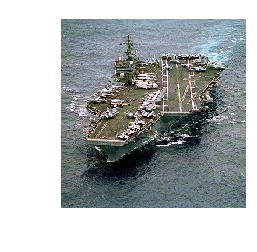

In [3]:
img_path = '001.png'
img = image.load_img(img_path, target_size=(224,224))

plt.imshow(img)
plt.grid('off')
plt.axis('off')

# Create a batch and preprocess the image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

# Get the initial predictions
preds = model.predict(x)
initial_class = np.argmax(preds)
print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

In [4]:
with open(filename,'a') as f:
    f.seek(0)
    f.truncate()###使用txt时先清空数据
    data=vgg16.decode_predictions(preds, top=150)[0]
    for i in range(len(data)):
        s = str(data[i]).replace('(','').replace(')','\n')
        s = s.replace("'",'').replace(',','').replace(' ',",'").replace('_',' ').replace('"','')
        f.write(s)

In [5]:
def loadData(filePath):
    fr = open(filePath)
    lines = fr.readlines()
    data1 = []
    names = []
    data2 = []
    for line in lines:
        items = line.strip().split(',')
        data1.append(items[0])
        names.append(items[1])
        data2.append(items[2])
    return data1, names, data2     

In [6]:
target, names, zhixindu = loadData('data.txt')
for i in range(len(zhixindu)):
    zhixindu[i] = zhixindu[i].replace("'",'')

In [7]:
with open(filename1,'a') as f:
    f.seek(0)
    f.truncate()###使用txt时先清空数据

In [8]:
for j in range(0,len(names)):
    backname1 = names[j]+ ','      ####区分imagenet中单词lion和lionfish
    backname2 = names[j]+ "'"
    f = open('imgnet.txt','r')
    lines = f.readlines()
    for lines in lines:
        if backname1 in lines:
            netdata = []
            netname = []
            item = lines.strip().split(':')
            netdata.append(int(item[0]))
            netname.append(item[1])
            target_class = netdata[0]
            print(j,target_class)
        if backname2 in lines:
            netdata = []
            netname = []
            item = lines.strip().split(':')
            netdata.append(int(item[0]))
            netname.append(item[1])
            target_class = netdata[0]
            print(j,target_class)
    
    if j==0:
        targetc = target_class
        continue
    epsilon = 5
    #target_class = m
    prev_probs = []
    sess = K.get_session()
    x_adv = x
    x_noise = np.zeros_like(x)
    # One hot encode the initial class
    target = K.one_hot(target_class, 1000)
    
    # Get the loss and gradient of the loss wrt the inputs
    loss = -1*K.categorical_crossentropy(target, model.output)
    grads = K.gradients(loss, model.input)

    # Get the sign of the gradient
    delta = K.sign(grads[0])
    x_noise = x_noise + delta

    # Perturb the image
    x_adv = x_adv + epsilon*delta

    # Get the new image and predictions
    x_adv = sess.run(x_adv, feed_dict={model.input:x})
    preds = model.predict(x_adv)

    # Store the probability of the target class
    prev_probs.append(preds[0][target_class])
    
    with open(filename1,'a') as f:
        f.write(str(preds[0][target_class]))
        f.write(','+str(target_class)+',')
        f.write(names[j]+'\n')
    

0 540
1 913
2 403
3 978
4 975
5 976
6 437
7 972
8 460
9 134
9 517
10 724
11 483
12 536
13 718
14 510
15 449
16 833
17 625
18 525
19 628
20 780
21 488
22 916
23 694
24 408
25 979
26 977
27 554
28 484
29 973
30 425
31 825
32 611
33 586
34 970
35 984
36 698
37 595
38 866
39 50
40 562
41 821
42 405
43 600
44 497
45 49
46 646
47 716
48 980
49 839
50 730
51 657
52 814
53 327
54 871
55 649
56 776
57 921
58 914
59 147
60 409
61 872
62 677
63 442
64 683
65 576
66 733
67 549
68 634
69 701
70 148
71 744
72 895
73 471
74 755
75 791
76 616
77 983
78 695
79 958
80 812
81 4
82 783
83 506
84 908
85 447
86 557
87 847
88 843
89 982
90 296
91 879
92 399
93 912
94 561
95 417
96 853
97 65
98 693
99 472
100 448
101 500
102 421
103 888
104 433
105 150
106 974
107 856
108 491
109 703
110 34
111 663
112 360
113 682
114 832
115 743
116 580
117 33
118 758
119 183
120 858
121 256
122 538
123 706
124 609
125 58
126 337
127 900
128 203
129 892
130 112
131 870
132 801
133 664
134 741
135 6
136 660
137 494
138 223
13

In [9]:
zhixindu1, target1, names1 = loadData('data1.txt')

for i in range(len(zhixindu1)):
    zhixindu1[i] = float(zhixindu1[i])
#print(zhixindu1)  
zhixindu1.sort(reverse=True)
print(zhixindu1)
#print(target1)

[0.9972594, 0.98932475, 0.78254807, 0.76756054, 0.7525759, 0.6893209, 0.65271586, 0.51034987, 0.44647375, 0.42169625, 0.38458788, 0.34797627, 0.34707046, 0.3387091, 0.32302883, 0.3192469, 0.31742996, 0.27098566, 0.27020255, 0.23857163, 0.22803332, 0.20437746, 0.19571753, 0.18535839, 0.18363808, 0.1666493, 0.16272597, 0.14156494, 0.13775806, 0.13726316, 0.12898138, 0.12690862, 0.115680166, 0.11189539, 0.105442554, 0.10127486, 0.09921837, 0.09085595, 0.085769184, 0.07978898, 0.079556, 0.07650155, 0.065718055, 0.06525951, 0.06473069, 0.06353452, 0.059733115, 0.058764506, 0.05799844, 0.056822143, 0.056539778, 0.047751367, 0.042214125, 0.040134963, 0.03980357, 0.03784944, 0.036392618, 0.03575324, 0.033478603, 0.033303525, 0.031976305, 0.02903886, 0.028473813, 0.02742069, 0.025035132, 0.023627609, 0.023549387, 0.022850128, 0.019829247, 0.019643473, 0.016544908, 0.01651013, 0.016409736, 0.016076822, 0.015916584, 0.01558874, 0.015266864, 0.014664844, 0.0133386105, 0.013199737, 0.012380174, 0.0

In [10]:
with open(filename2,'a') as f:
    f.seek(0)
    f.truncate()###使用txt时先清空数据
m4=0
for j in range(0,10):
    f = open('data1.txt','r').readlines()
    for p in range(len(f)):
        if str(zhixindu1[j]) in f[p]:
            realname = names1[p]
            with open(filename2,'a') as f1:
                if zhixindu1[j]>0.75:
                    if zhixindu1[j]>0.9:
                        m4+=1
                    f1.write(str(zhixindu1[j]))
                    f1.write(','+target1[p]+',')
                    f1.write(realname+'\n')

In [11]:
zhixindu2, target2, names2 = loadData('data2.txt')

for i in range(len(zhixindu2)):
    zhixindu2[i] = float(zhixindu2[i])
    target2[i] = round(float(target2[i]))
print(zhixindu2)
print(target2)

[0.9972594, 0.98932475, 0.78254807, 0.76756054, 0.7525759]
[611, 586, 58, 403, 978]


In [12]:
zhixindu4=[]

for j in range(0,len(names2)):
    for i in range(0,3):
        if i<=1:
            target_class=target2[j]
        if i >1:
            target_class=targetc
            
        prev_probs = []
        sess = K.get_session()
        if i==0:
            x_adv = x
            epsilon = 2
            x_noise = np.zeros_like(x)  
        if i==1:
            x_adv = x
            epsilon = 5
            x_noise = np.zeros_like(x)
        if i>1:
            x_adv = x_adv1
            if m4 < 3:
                epsilon = 3
            if m4 >= 3 and m4<=6:
                epsilon = 5
            if m4 >6:
                epsilon = 6
            x_noise = np.zeros_like(x_adv1)
   
        # One hot encode the initial class
        target = K.one_hot(target_class, 1000)
        # Get the loss and gradient of the loss wrt the inputs
        loss = -1*K.categorical_crossentropy(target, model.output)
        grads = K.gradients(loss, model.input)

        # Get the sign of the gradient
        delta = K.sign(grads[0])
        x_noise = x_noise + delta

        # Perturb the image
        x_adv = x_adv + epsilon*delta

        # Get the new image and predictions
        x_adv = sess.run(x_adv, feed_dict={model.input:x})
        preds = model.predict(x_adv)

        # Store the probability of the target class
        prev_probs.append(preds[0][target_class])
    
        if i==0:
            if preds[0][target_class]<0.7:
                zhixindu2[j]=0
                zhixindu4.append(0)
                break
        if i==1:
            x_adv1=x_adv
        
        if i>1:
            zhixindu4.append(preds[0][target2[j]])
            print(j,[target_class],preds[0][target2[j]])
            
#print(zhixindu2)


0 [540] 0.9959241
1 [540] 0.9941831
3 [540] 0.9956989
4 [540] 0.8500731


In [13]:
zhixindu5=[]
names6=[]
target6=[]
zhixindu6=[]
zhixindu5=zhixindu4.copy()
#print(targetc)
#print(names2)
#print(zhixindu4)

for i in range(0,2):
    t1 = zhixindu5.index(max(zhixindu5))
    zhixindu6.append(zhixindu4[t1])
    names6.append(names2[t1])
    target6.append(target2[t1])
    zhixindu5[t1]=0
print('置信度',zhixindu6)
print('类别',names6)
print('序列号',target6)
print('以上是候选的2个目标')
print()

if zhixindu6[0]-zhixindu6[1]>0.2: ###差距过大直接选，不大再筛选
    names6[1]=names6[0]
for j in range(0,2):
    target_class=target6[j]
    prev_probs = []
    sess = K.get_session()
    x_adv = x
    if m4 < 3:
        epsilon = 2
    if m4 >= 3 and m4<=6:
        epsilon = 22
    if m4 >6:
        epsilon = 25
    
    x_noise = np.zeros_like(x)
   
    # One hot encode the initial class
    target = K.one_hot(target_class, 1000)
    # Get the loss and gradient of the loss wrt the inputs
    loss = -1*K.categorical_crossentropy(target, model.output)
    grads = K.gradients(loss, model.input)

    # Get the sign of the gradient
    delta = K.sign(grads[0])
    x_noise = x_noise + delta

    # Perturb the image
    x_adv = x_adv + epsilon*delta

    # Get the new image and predictions
    x_adv = sess.run(x_adv, feed_dict={model.input:x})
    preds = model.predict(x_adv)
            
    # Store the probability of the target class
    prev_probs.append(preds[0][target_class])
                
            
    zhixindu6[j]=preds[0][target_class]
                    
t3 = zhixindu6.index(max(zhixindu6))
print('最终评价指标',zhixindu6)
print()
print('程序运行结果:')
print('target:',names6[t3])
        

置信度 [0.9959241, 0.9956989]
类别 ["'jigsaw puzzle", "'aircraft carrier"]
序列号 [611, 403]
以上是候选的2个目标

最终评价指标 [0.9354984, 0.9712326]

程序运行结果:
target: 'aircraft carrier
